In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv', usecols=['Age', 'Fare', 'Survived'])

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
# Age has missing Values
df.isna().sum()

,0
Survived,0
Age,177
Fare,0


In [9]:
# filled missing Age values with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [10]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
df.isna().sum()

,0
Survived,0
Age,0
Fare,0


In [12]:
# TRAIN TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Survived']),
                                                    df['Survived'],
                                                    test_size=0.2,
                                                    random_state=42)

<ipython-input-15-4b9988d4da0e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


Text(0.5, 1.0, 'Age QQ Plot')

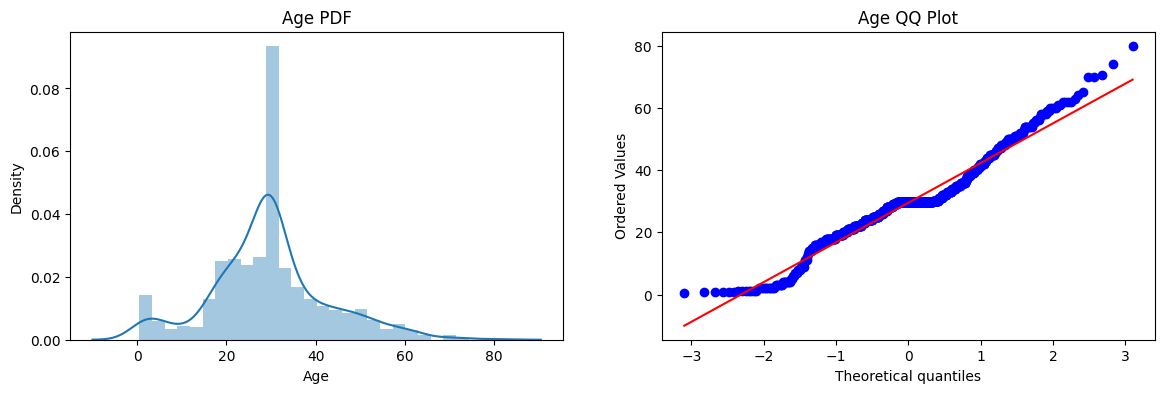

In [15]:
# ANALYSING THE SKEWNESS IN AGE

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

<ipython-input-26-e48fdac2d0ad>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


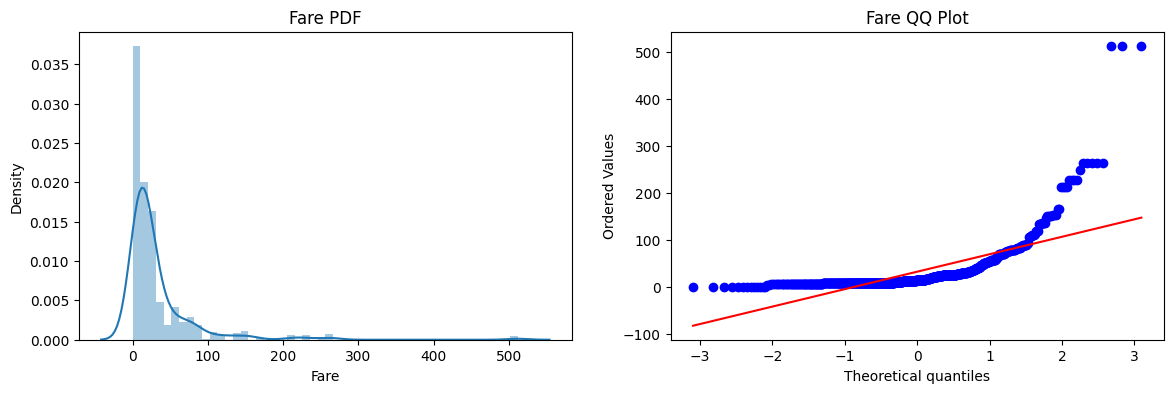

In [26]:
# ANALYSING SKEWNESS IN FARE

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [17]:
# MODEL TRAINING WITHOUT ANY TRANSFORMATIONS

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [19]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred2))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6703910614525139


#### TRANSFORMING `Age` AND `Fare` USING LOG TRANSFORMATION

In [21]:
trf = FunctionTransformer(func=np.log1p)

In [28]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [23]:
# MODEL TRAINING AFTER LOG TRANSFORMING AGE AND FARE

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [24]:
clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

print("Accuracy LR after Transformation", accuracy_score(y_test, y_pred))
print("Accuracy DT after Transformation", accuracy_score(y_test, y_pred2))



Accuracy LR after Transformation 0.6815642458100558
Accuracy DT after Transformation 0.6871508379888268


In [34]:
# CROSS VALIDATION
# DECISION TREE HAS NO SIGNIFICANT EFFECT OF TRANSFORMATIONS
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_train_transformed, y_train, cv=10, scoring='accuracy')))
print("DT", np.mean(cross_val_score(clf2, X_train_transformed, y_train, cv=10, scoring='accuracy')))



LR 0.6783646322378717
DT 0.6263302034428795


### `Fare` was well fitted into Normal Distribution after applying Log Transformation

Text(0.5, 1.0, 'Age After Log')

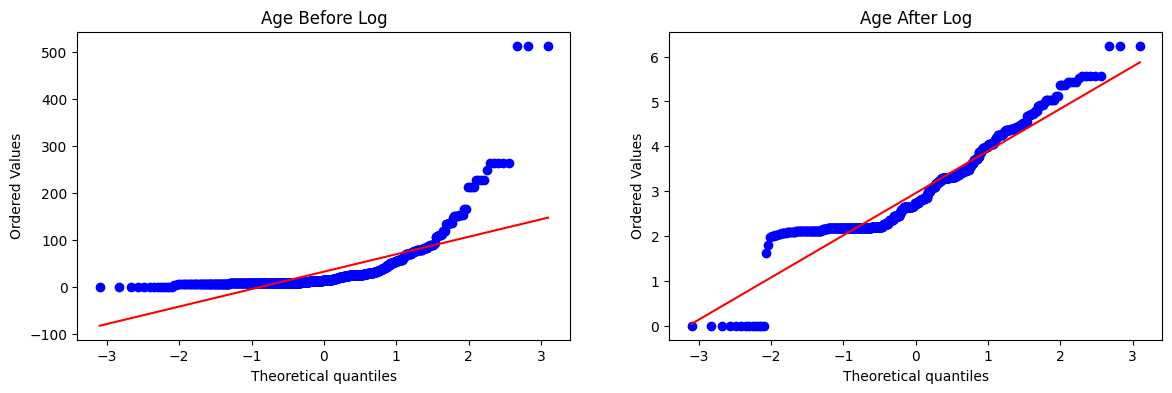

In [36]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Age After Log')

### But `Age` was worsened after applying Log Transformation

Text(0.5, 1.0, 'Age After Log')

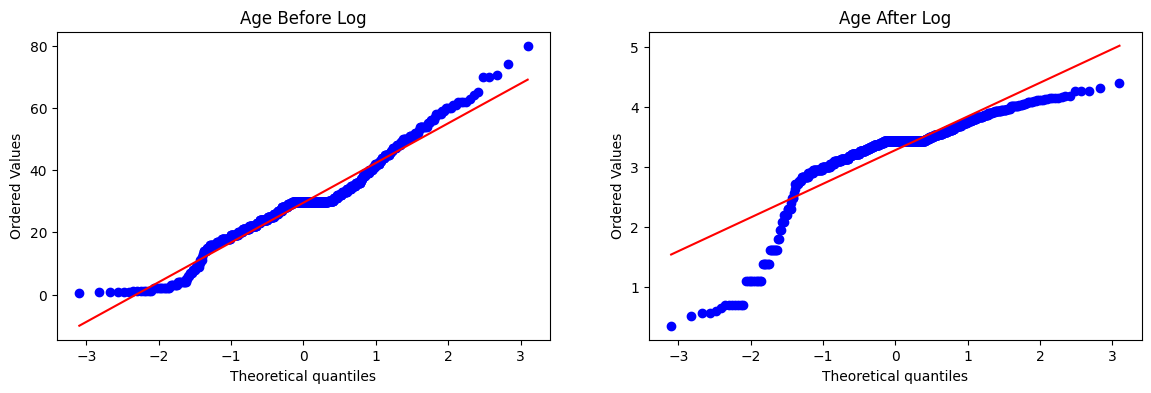

In [35]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

## Now we will only Transform `Fare` not `Age`

In [52]:
# COLUMN TRANSFORMER TO TRANSFORM FARE

trf2 = ColumnTransformer([
    ('log', FunctionTransformer(np.log1p), ['Fare'])
], remainder='passthrough')

# APPLYING TRANSFORMATION
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [53]:
# MODEL TRAINING

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

# ACCURACY IS INCREASED

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6703910614525139


In [54]:
print("LR", np.mean(cross_val_score(clf, X_train_transformed2, y_train, cv=10, scoring='accuracy')))
print("DT", np.mean(cross_val_score(clf2, X_train_transformed2, y_train, cv=10, scoring='accuracy')))

LR 0.6572378716744913
DT 0.6193661971830986


## **Function to check effect of different transformations on the accuracy of Model**

In [44]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()


Accuracy 0.6712609238451936


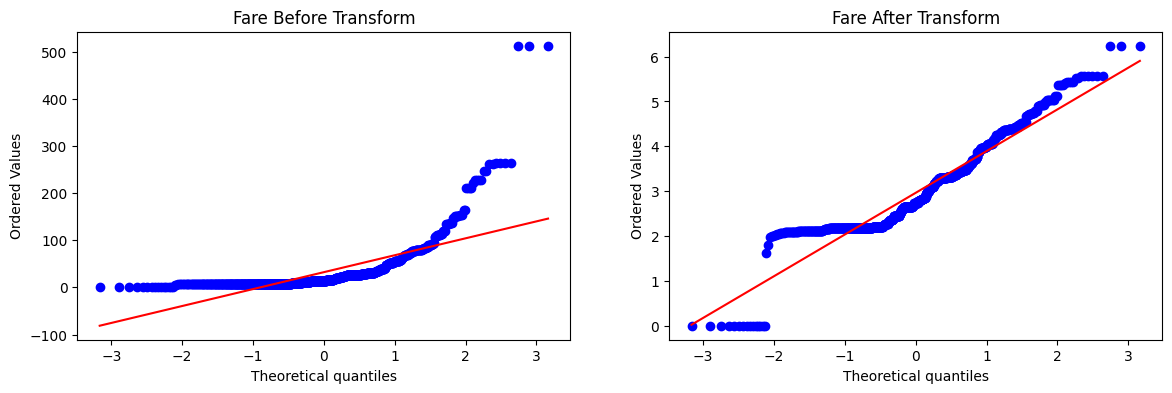

In [51]:
apply_transform(lambda x : np.log1p(x))